In [1]:
pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 5.0 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=4d5dbeedf523664cd3e0feb74a8014de7828b7fb26019b5f33e84d8e8c254731
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from lifelines import KaplanMeierFitter

In [3]:
df = pd.read_csv("/kaggle/input/national-cemetery-data/National_Cemetery_Administration_-_Gravesite_Locator_20250128.csv")

<ipython-input-3-1d97ee2b77d0>:1: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/national-cemetery-data/National_Cemetery_Administration_-_Gravesite_Locator_20250128.csv")


In [4]:
print(df.shape)
df.sample(5).T

(8423164, 28)


,490564,604572,17090,5348396,3997496
decedent_id,100642,1358434,718107,8375577,3571107
First Name of Deceased,John,Benjamin,Robert,Mary,David
Middle Name of Deceased,W,Franklin,Roy,J,A
Last Name of Deceased,Peryman,Bowers,Holpp,Gumbiner,Ray
Suffix of Deceased,Jr,NaN,NaN,NaN,NaN
Birth Date of Deceased,09/17/1914,05/20/1846,08/15/1922,04/25/1924,05/08/1835
Death Date of Deceased,01/02/1997,07/01/1914,10/05/1999,01/29/2011,05/04/1901
Section ID,NaN,NaN,NaN,59,6
Row,NaN,NaN,NaN,13,NaN
Site Number,NaN,NaN,NaN,23,872


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8423164 entries, 0 to 8423163
Data columns (total 28 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   decedent_id                     int64 
 1   First Name of Deceased          object
 2   Middle Name of Deceased         object
 3   Last Name of Deceased           object
 4   Suffix of Deceased              object
 5   Birth Date of Deceased          object
 6   Death Date of Deceased          object
 7   Section ID                      object
 8   Row                             object
 9   Site Number                     object
 10  Name of Cemetery                object
 11  Cemetery Address 1              object
 12  Cemetery Address 2              object
 13  Cemetery City                   object
 14  Cemetery State                  object
 15  Cemetery ZIP                    object
 16  Cemetery URL                    object
 17  Cemetery Phone Number           object
 18  Re

In [6]:
print("Missing Values per Column")
print(df.isnull().sum())

Missing Values per Column
decedent_id                             0
First Name of Deceased                 19
Middle Name of Deceased           1575227
Last Name of Deceased                   0
Suffix of Deceased                7731417
Birth Date of Deceased             489758
Death Date of Deceased             117508
Section ID                        2332581
Row                               7214782
Site Number                       2327113
Name of Cemetery                        0
Cemetery Address 1                 697495
Cemetery Address 2                7455755
Cemetery City                        3126
Cemetery State                       3065
Cemetery ZIP                         6444
Cemetery URL                      2463976
Cemetery Phone Number              403391
Relationship to Veteran             16851
First Name of Related Veteran        1203
Middle Name of Related Veteran    1494778
Last Name of Related Veteran         1182
Suffix of Related Veteran         7597778
Military

In [7]:
# Duplicated decedent_id
print(df['decedent_id'].duplicated().sum())

0


zero duplicated IDs, good

In [8]:
df["Birth Date of Deceased"] = pd.to_datetime(df["Birth Date of Deceased"], format="%m/%d/%Y", errors="coerce")
df["Death Date of Deceased"] = pd.to_datetime(df["Death Date of Deceased"], format="%m/%d/%Y", errors="coerce")
df['last_update_date'] = pd.to_datetime(df['last_update_date'], format = '%m/%d/%Y', errors='coerce')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


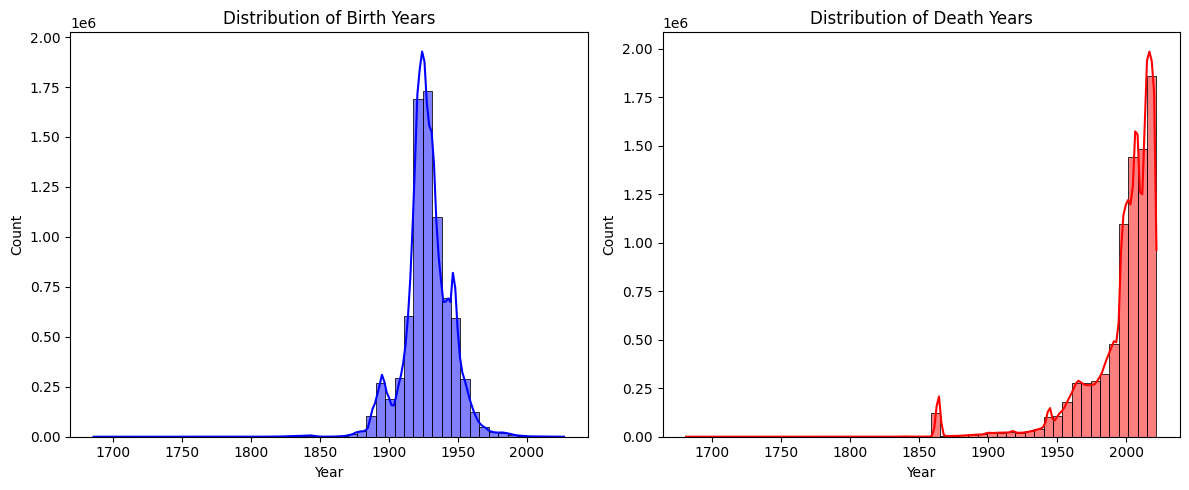

In [9]:
df["Birth Year"] = df["Birth Date of Deceased"].dt.year
df["Death Year"] = df["Death Date of Deceased"].dt.year

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df["Birth Year"].dropna(), bins=50, kde=True, color="blue")
plt.title("Distribution of Birth Years")
plt.xlabel("Year")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.histplot(df["Death Year"].dropna(), bins=50, kde=True, color="red")
plt.title("Distribution of Death Years")
plt.xlabel("Year")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [10]:
df['Age at Death'] = (df['Death Date of Deceased'] - df['Birth Date of Deceased']).dt.days / 365.25
print(df[['Birth Date of Deceased', 'Death Date of Deceased', 'Age at Death']].head())

  Birth Date of Deceased Death Date of Deceased  Age at Death
0             1932-01-22             2022-02-17     90.072553
1             1949-08-13             2022-05-10     72.739220
2             1927-08-07             2014-09-03     87.074606
3             1938-08-16             2022-01-24     83.441478
4             1948-08-30             2021-03-05     72.511978


In [11]:
incorrect_count = (df['Death Date of Deceased'] < df['Birth Date of Deceased']).sum()
print(f"Number of incorrect entries: {incorrect_count}")

Number of incorrect entries: 636


636 incorrect date entries. Will graph regardless

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


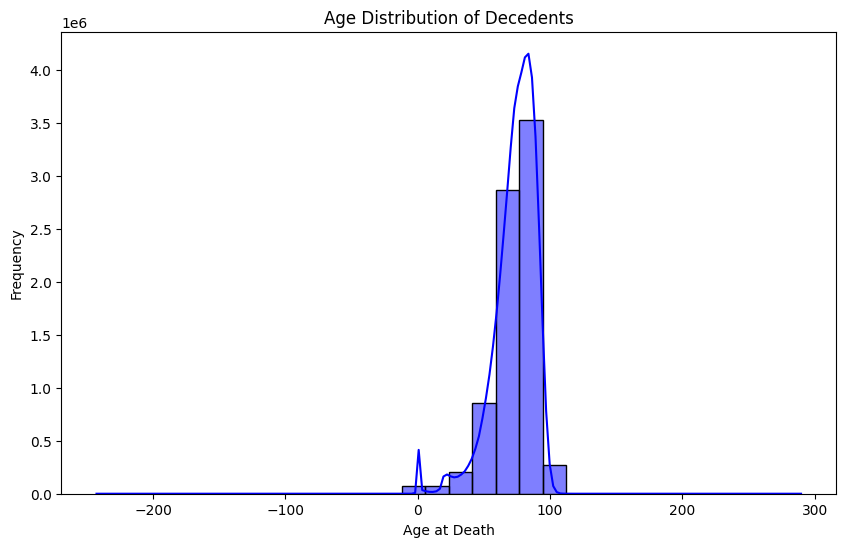

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age at Death'].dropna(), kde=True, bins=30, color='blue')
plt.title('Age Distribution of Decedents')
plt.xlabel('Age at Death')
plt.ylabel('Frequency')
plt.show()

seems like a reasonable maximum considering the incorrect dates included. 

In [13]:
print("\nTop Cemetery States:")
print(df['Cemetery State'].value_counts().head(5))


Top Cemetery States:
Cemetery State
CA    906926
NY    837042
TX    599347
FL    459886
MO    343387
Name: count, dtype: int64


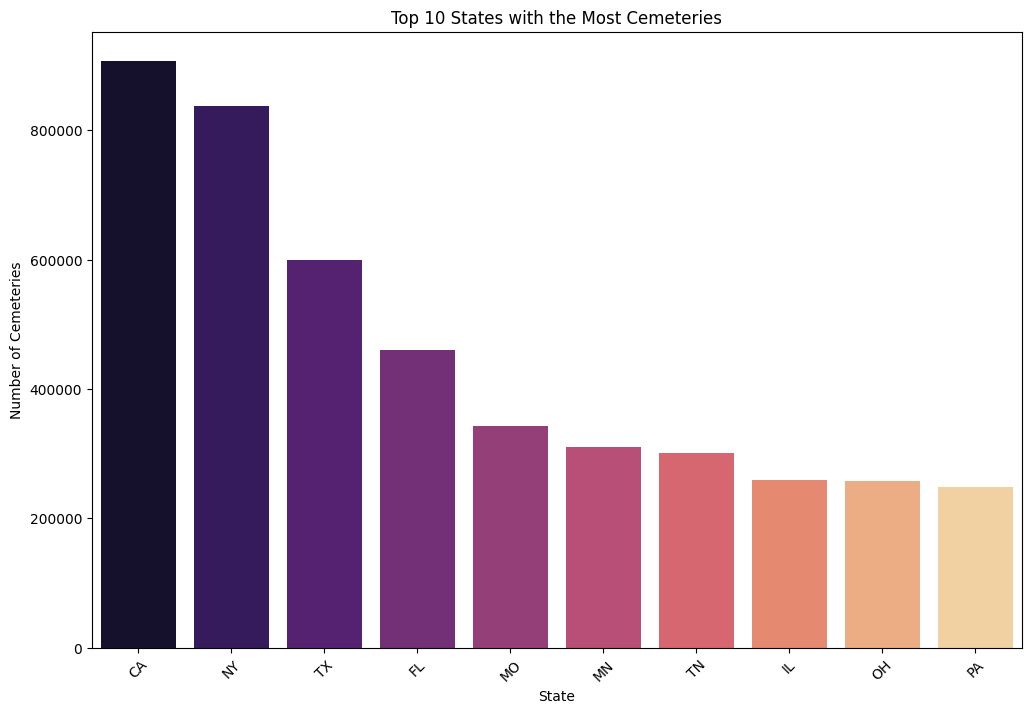

In [14]:
plt.figure(figsize=(12, 8))
state_counts = df['Cemetery State'].value_counts().head(10)  
sns.barplot(x=state_counts.index, y=state_counts.values, palette='magma')
plt.title('Top 10 States with the Most Cemeteries')
plt.xlabel('State')
plt.ylabel('Number of Cemeteries')
plt.xticks(rotation=45)
plt.show()

In [15]:
print("\nTop Cemetery Cities:")
print(df['Cemetery City'].value_counts().head(5))


Top Cemetery Cities:
Cemetery City
FARMINGDALE    358648
RIVERSIDE      298816
CALVERTON      283884
MINNEAPOLIS    253703
ST. LOUIS      236796
Name: count, dtype: int64


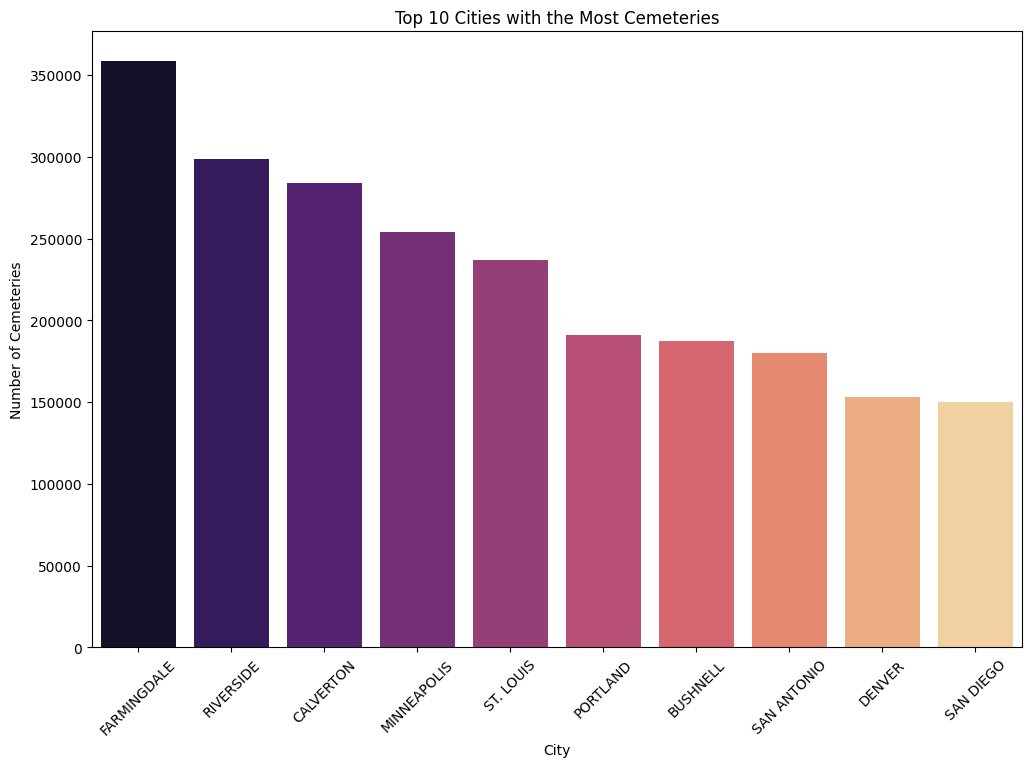

In [16]:
plt.figure(figsize=(12, 8))
city_counts = df['Cemetery City'].value_counts().head(10)  # Top 10 cities
sns.barplot(x=city_counts.index, y=city_counts.values, palette='magma')
plt.title('Top 10 Cities with the Most Cemeteries')
plt.xlabel('City')
plt.ylabel('Number of Cemeteries')
plt.xticks(rotation=45)
plt.show()

In [17]:
print("\nBottom Cemetery States:")
print(df['Cemetery State'].value_counts().sort_values(ascending=True).head(5))


Bottom Cemetery States:
Cemetery State
FJ    1
VG    1
MM    1
PO    1
LR    1
Name: count, dtype: int64


In [18]:
print("\nBottom Cemetery Cities:")
print(df['Cemetery City'].value_counts().sort_values(ascending=True).head(5))


Bottom Cemetery Cities:
Cemetery City
WAMSUTTER     1
MCQUEENEY     1
ORSON         1
HONOBIA       1
ST. THOMAS    1
Name: count, dtype: int64


In [19]:
print(df['Location Point'].dropna().head(5).tolist())

['POINT (-81.26162 35.27018)', 'POINT (-96.332704 43.437499)', 'POINT (-79.71096 35.62384)', 'POINT (-87.98477 33.58656)', 'POINT (-73.89641 41.72104)']


In [20]:
df[['Longitude', 'Latitude']] = df['Location Point'].str.extract(r'POINT \(([-0-9\.]+) ([-0-9\.]+)\)')
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

In [21]:
# Sanity check for coordinate accuracy
invalid_coords = df[
    (df['Latitude'].abs() > 90) | 
    (df['Longitude'].abs() > 180)
]
if not invalid_coords.empty:
    print("\nFound invalid coordinates:")
    display(invalid_coords[['Location Point', 'Latitude', 'Longitude']])
else:
    print("\nAll coordinates good.")


All coordinates good.


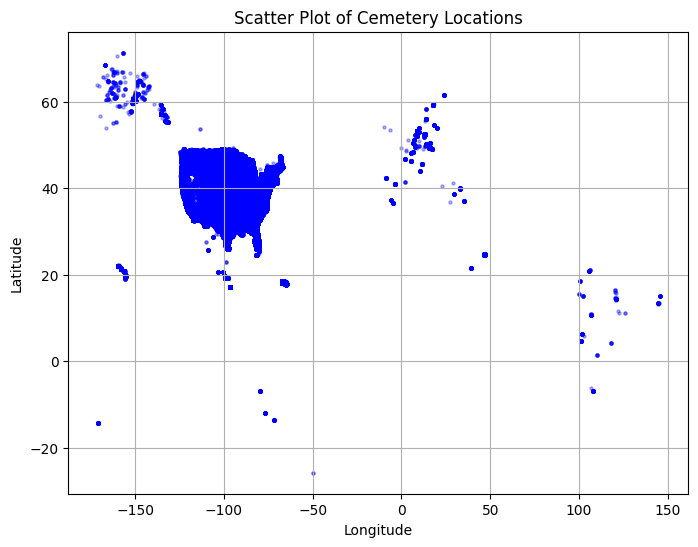

In [22]:
# Distribution scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.3, color='blue', s=5)
plt.title('Scatter Plot of Cemetery Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

Most in U.S.
    Tried making better maps, but not enough space within Kaggle. 

In [23]:
print("\nRelationship to Veteran Counts:")
print(df['Relationship to Veteran'].value_counts())

print("\nMilitary Branch Counts:")
print(df['Military Branch'].value_counts())

print("\nWar(s) Served Counts:")
print(df['War(s) Served'].value_counts().head(10))



Relationship to Veteran Counts:
Relationship to Veteran
Veteran (Self)                  6699563
Wife                            1587960
Son (Minor Child)                 54326
Daughter (Minor Child)            36646
Adult Dependent Son                9359
Husband                            6178
Adult Dependent Daughter           6075
Civilian                           1883
Son (Adult)                         804
Foreign Veteran                     674
Daughter (Adult)                    653
Mother                              523
Stepson (Minor Child)               359
Other Relative                      324
Not Related                         209
Stepdaughter (Minor Child)          198
Father                              177
Adult Dependent Stepson             139
Adult Dependent Stepdaughter         98
Stepson (Adult)                      47
Sister                               40
Stepdaughter (Adult)                 34
Brother                              27
Stepfather             

6699563 veterans within the database, with 4587641 individuals from the U.S. Army. The war with the highest number of deceased veterans who served is World War II. 

In [24]:
cem_stats = df.groupby('Name of Cemetery').agg(
    count=('decedent_id', 'count'),
    avg_age=('Age at Death', 'mean')
).sort_values(by='count', ascending=False).head(10)
print("\nTop 10 Cemeteries:")
print(cem_stats)


Top 10 Cemeteries:
                                       count    avg_age
Name of Cemetery                                       
LONG ISLAND NATIONAL CEMETERY         358023  60.771512
RIVERSIDE NATIONAL CEMETERY           297996  74.414333
CALVERTON NATIONAL CEMETERY           283877  72.677529
FT. SNELLING NATIONAL CEMETERY        250936  71.050840
JEFFERSON BARRACKS NATIONAL CEMETERY  236796  70.419073
WILLAMETTE NATIONAL CEMETERY          188985  71.890309
FLORIDA NATIONAL CEMETERY             187378  77.404289
FT. SAM HOUSTON NATIONAL CEMETERY     174906  68.937832
FT. LOGAN NATIONAL CEMETERY           152532  71.941416
GOLDEN GATE NATIONAL CEMETERY         145399  61.217380


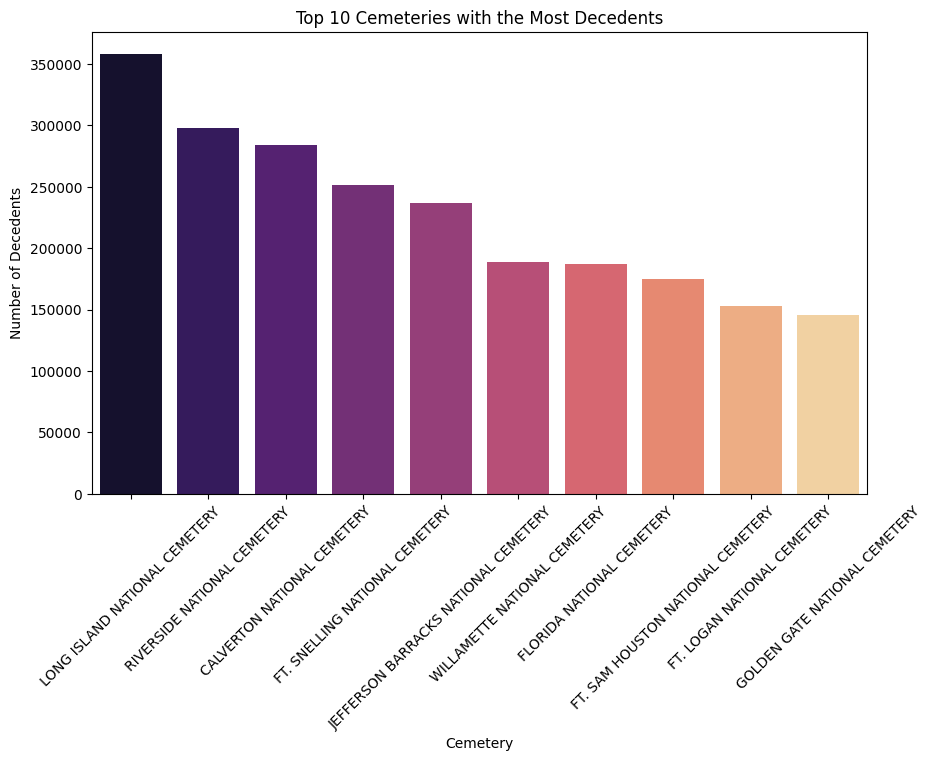

In [25]:
plt.figure(figsize=(10, 6))
cemetery_counts = df['Name of Cemetery'].value_counts().head(10)  
sns.barplot(x=cemetery_counts.index, y=cemetery_counts.values, palette='magma')
plt.title('Top 10 Cemeteries with the Most Decedents')
plt.xlabel('Cemetery')
plt.ylabel('Number of Decedents')
plt.xticks(rotation=45)
plt.show()

In [26]:
print("\nTop 10 Most Common Last Names:")
print(df['Last Name of Deceased'].value_counts().head(10))


Top 10 Most Common Last Names:
Last Name of Deceased
Smith       86229
Johnson     69267
Unknown     53338
Williams    53158
Brown       50378
Jones       48759
Miller      38090
Davis       37476
Anderson    29584
Wilson      29050
Name: count, dtype: int64


In [27]:
print("\nTop 10 Most Common First Names:")
print(df['First Name of Deceased'].value_counts().head(10))


Top 10 Most Common First Names:
First Name of Deceased
John       368639
James      326489
Robert     256809
William    222014
Charles    191228
Joseph     156968
George     154873
Richard    123030
Donald     113623
Edward     110501
Name: count, dtype: int64


In [28]:
df['Birth Year'] = df['Birth Date of Deceased'].dt.year
df.groupby('Birth Year')['First Name of Deceased'].apply(lambda x: x.value_counts().head(1))

Birth Year          
1686.0      Winifred    1
1713.0      Samuel      1
1716.0      Isaiah      1
1717.0      Robert      1
1718.0      Chester     1
                       ..
2019.0      Olivia      2
2020.0      Michael     3
2021.0      Madeline    2
2022.0      Joshua      2
2027.0      Richard     1
Name: First Name of Deceased, Length: 307, dtype: int64

In [29]:
unique_names = df['First Name of Deceased'].value_counts()
unique_names = unique_names[unique_names == 1].index  
random_20_unique = unique_names.to_series().sample(20, random_state=42).tolist()
print(random_20_unique)

['Adeson', 'S----', 'Axine', 'Degrant', 'Lamertine', 'Minniette', 'Agen', 'Daiso', 'Clu Flu', 'Tomazene', 'Cuffee', 'Roszena', 'Redgiel', 'Theophill', 'Lorica', 'Serafia', 'Loranzia', 'Lola Lee', 'Curverson', 'Lisiria']


In [30]:
unique_last_names = df['Last Name of Deceased'].value_counts()
unique_last_names = unique_last_names[unique_last_names == 1].index
random_20_unique_last = unique_last_names.to_series().sample(min(20, len(unique_last_names)), random_state=42).tolist()
print(random_20_unique_last)

['Daniels-Gireaud', 'Melliger', 'Rywolt', 'La Flokest', 'Schnabley', 'Killawee', 'Garbitt', 'Casserbaum', 'Iedema', 'Odebert', 'Wemhaner', 'Traughbaugh', 'Auzfarski', 'Bunne', 'Kouracos', 'Farda', 'Scalford', 'Zemzicki', 'Brassey', 'Nigen']


In [31]:
df['Birth Decade'] = (df['Birth Date of Deceased'].dt.year // 10) * 10
decade_name_trends = df.groupby('Birth Decade')['First Name of Deceased'].apply(lambda x: x.value_counts().head(1))
print(decade_name_trends)

Birth Decade          
1680.0        Winifred         1
1710.0        Robert           1
1720.0        Samuel           2
1730.0        John             5
1740.0        John            21
1750.0        John            41
1760.0        John            33
1770.0        John             8
1780.0        John            18
1790.0        John            24
1800.0        John            23
1810.0        John           111
1820.0        John           346
1830.0        John           787
1840.0        John           893
1850.0        John            52
1860.0        John           247
1870.0        John          1526
1880.0        John          5632
1890.0        John         17717
1900.0        John         11848
1910.0        John         50068
1920.0        John        110284
1930.0        James        73666
1940.0        James        53455
1950.0        James        17166
1960.0        Michael       4849
1970.0        Michael       1398
1980.0        Michael        839
1990.0        Michae

In [32]:
df['Name Length'] = df['First Name of Deceased'].str.len()
shortest = df.loc[df['Name Length'].idxmin(), 'First Name of Deceased']
longest = df.loc[df['Name Length'].idxmax(), 'First Name of Deceased']
print(shortest)
print(longest)

W
Joaquin Alfredo


In [33]:
df['First Initial'] = df['First Name of Deceased'].str[0]
df.groupby('First Initial')['Age at Death'].mean().sort_values(ascending=False)
# correlation of letters and lifespans

First Initial
H    75.544936
E    75.397748
O    75.330527
,    75.255305
V    75.156033
F    74.873456
N    74.420038
A    74.371549
M    74.041725
L    74.034594
G    73.559660
C    73.303951
B    73.201540
R    72.905862
P    72.852758
Y    72.821557
J    72.617035
Z    72.323438
Q    72.146171
D    71.800489
W    71.573091
I    71.352469
1    70.624230
S    70.386758
K    69.689096
T    69.606955
5    65.533196
X    59.353463
'    57.805613
U    56.333747
-    16.436687
Name: Age at Death, dtype: float64

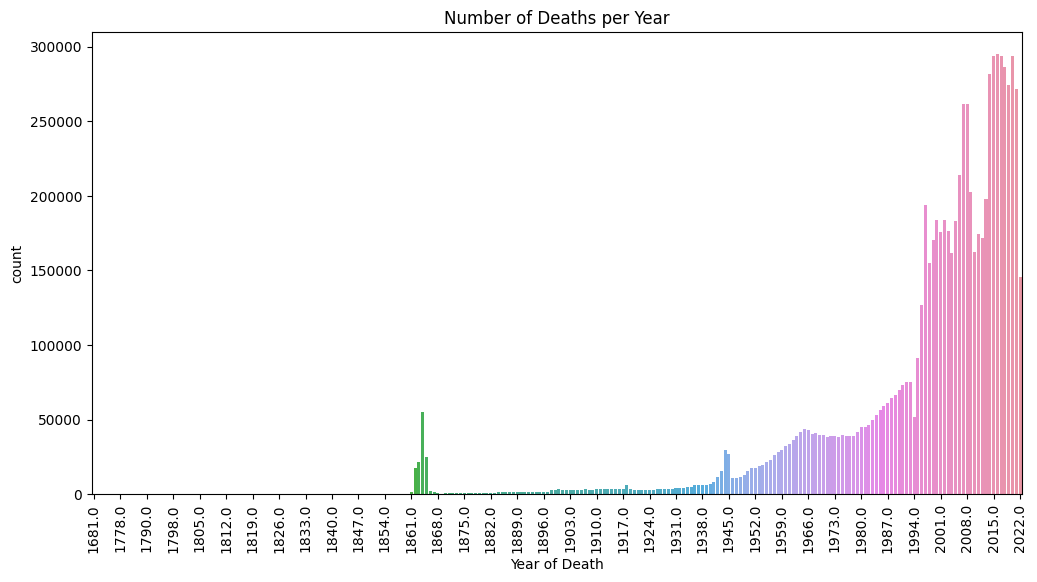

In [34]:
df['Year of Death'] = df['Death Date of Deceased'].dt.year
plt.figure(figsize=(12,6))

sns.countplot(x='Year of Death', data=df, order=sorted(df['Year of Death'].dropna().unique()))
plt.xticks(rotation=90)
plt.xticks(ticks=range(0, len(df['Year of Death'].dropna().unique()), 7))
plt.title('Number of Deaths per Year')
plt.show()

In [35]:
above_120 = df[df['Age at Death'] > 120].sort_values(by='Age at Death', ascending=False).head(10)

# Print the top 10 outliers with ages greater than 120
print("\nTop 10 Ages > 120:")
print(above_120)


Top 10 Ages > 120:
         decedent_id First Name of Deceased Middle Name of Deceased  \
1096937      2898956               Franklin                       D   
986005       2336244                Chester                 Anthony   
4649320      7455924                Cecilia                     NaN   
13406         579978                 Robert                       L   
555556        127766                   P  C                     NaN   
6163184      9478612                Herbert                       W   
8273990      3463596                   Paul                       J   
337178        110454                Charles                  Wilson   
1551556      4185114                  Jimmy                       G   
8096705      3390848                   Lacy                       F   

        Last Name of Deceased Suffix of Deceased Birth Date of Deceased  \
1096937               Blamble                NaN             1719-06-17   
986005               Mosinski                NaN

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


 289 years as the longest lived for this database ?

In [36]:
print(df.iloc[1096937])

decedent_id                                      2898956
First Name of Deceased                          Franklin
Middle Name of Deceased                                D
Last Name of Deceased                            Blamble
Suffix of Deceased                                   NaN
Birth Date of Deceased               1719-06-17 00:00:00
Death Date of Deceased               2009-02-27 00:00:00
Section ID                                           NaN
Row                                                  NaN
Site Number                                          NaN
Name of Cemetery                  STEMPLE RIDGE CEMETERY
Cemetery Address 1                              AUROR WV
Cemetery Address 2                                   NaN
Cemetery City                     CUIDAD ACUNA, COAHUILA
Cemetery State                                        MX
Cemetery ZIP                                       26260
Cemetery URL                                         NaN
Cemetery Phone Number          

Franlin D. Blamble, lived to 71, date of birth was inputted incorrectly. Birth year is 1937
https://www.times-news.com/franklin-d-blamble-aurora/article_15a7a1d4-6256-5cad-9568-aefde92bd1bd.html

Several incorrect dates within the database :(

average birth year for world war II soldiers is around 1920. Did I make a mistake? (dates do seem to be formated correctly)

In [37]:
df_clean = df.dropna(subset=['Age at Death'])

Decided to only drop null values and leave the incorrectly inputed dates. 

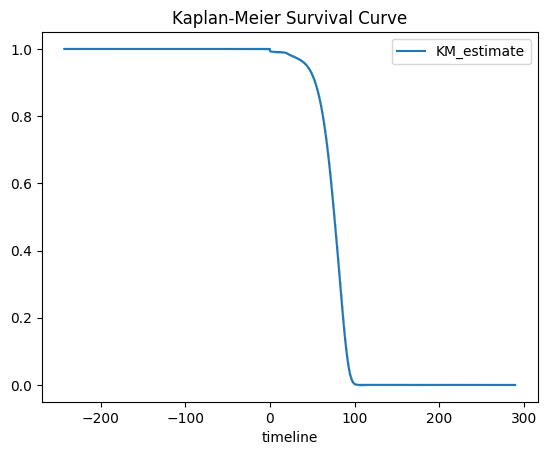

In [38]:
kmf = KaplanMeierFitter()
kmf.fit(df_clean['Age at Death'])
kmf.plot()
plt.title('Kaplan-Meier Survival Curve')
plt.show()

In [39]:
print(df_clean['War(s) Served'].value_counts().head(10))

War(s) Served
WORLD WAR II                    3093035
VIETNAM                         1208910
KOREA                           1120051
WORLD WAR I                      443017
WORLD WAR II, KOREA              235646
KOREA, VIETNAM                   180427
WORLD WAR II, KOREA, VIETNAM     155417
PERSIAN GULF                      73088
PERSIAN GULF, VIETNAM             31294
SP-AM WAR (in Moro Province)      19162
Name: count, dtype: int64


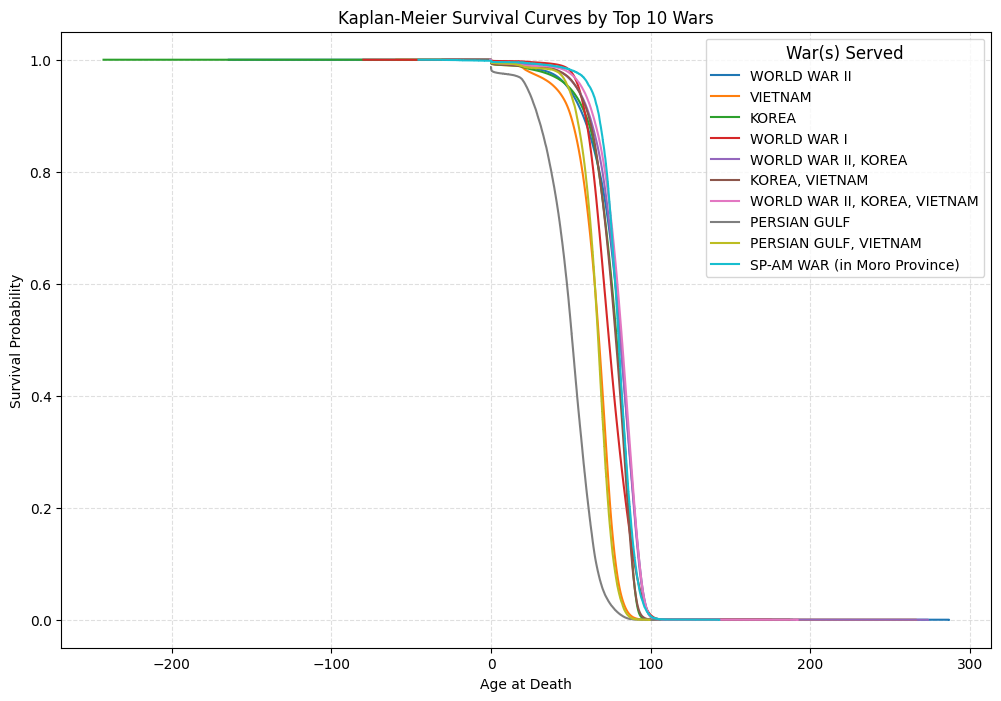

In [40]:
top_wars = df_clean['War(s) Served'].value_counts().head(10).index.tolist()

kmf = KaplanMeierFitter()
plt.figure(figsize=(12, 8))
for war_name in top_wars:
    subset = df_clean[df_clean['War(s) Served'] == war_name]
    if not subset.empty and subset['Age at Death'].notnull().any():
        kmf.fit(subset['Age at Death'].dropna(), label=str(war_name))
        kmf.plot(ci_show=False)

plt.title('Kaplan-Meier Survival Curves by Top 10 Wars')
plt.xlabel('Age at Death')
plt.ylabel('Survival Probability')
plt.legend(title='War(s) Served', fontsize=10, title_fontsize=12)
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


Now, I'll drop some of the incorrect birth/death entries and fit the model.

In [41]:
df_clean2 = df_clean[df_clean['Age at Death'] >= 0]

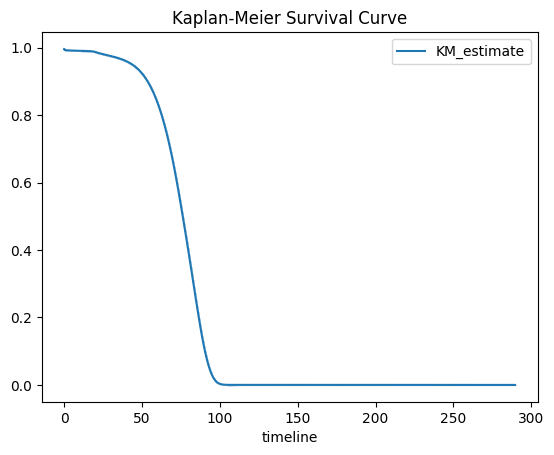

In [42]:
kmf = KaplanMeierFitter()
kmf.fit(df_clean2['Age at Death'])
kmf.plot()
plt.title('Kaplan-Meier Survival Curve')
plt.show()

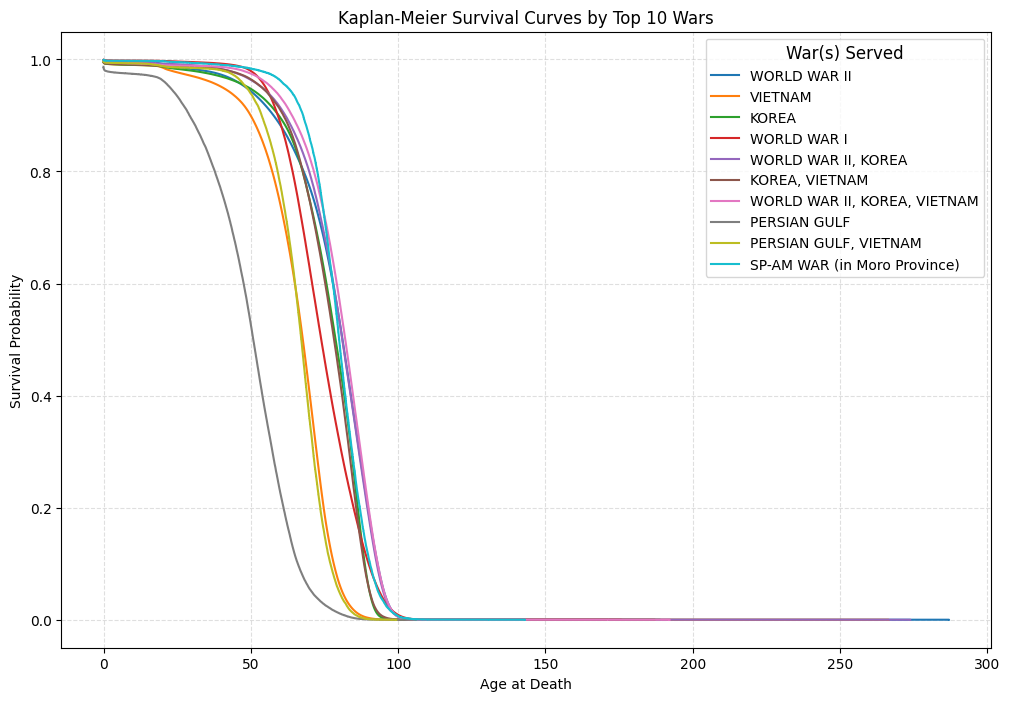

In [43]:
top_wars = df_clean2['War(s) Served'].value_counts().head(10).index.tolist()

kmf = KaplanMeierFitter()
plt.figure(figsize=(12, 8))
for war_name in top_wars:
    subset = df_clean2[df_clean2['War(s) Served'] == war_name]
    if not subset.empty and subset['Age at Death'].notnull().any():
        kmf.fit(subset['Age at Death'].dropna(), label=str(war_name))
        kmf.plot(ci_show=False)

plt.title('Kaplan-Meier Survival Curves by Top 10 Wars')
plt.xlabel('Age at Death')
plt.ylabel('Survival Probability')
plt.legend(title='War(s) Served', fontsize=10, title_fontsize=12)
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()